In [ ]:
# author: Michael Munz
# in -> csv
# reading raw csv files
# combining into single file
# initial inspection
#     df.shape
#     df.head
#     df.describe
# listing modalities
# identifying missing values
#     missing matrix
# out <- 1.0-munz-data-exploration_locations

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from joblib import dump, load


In [2]:
user_path = '/Users/honolulu/workspace/SEP25-BDS-ROAD-ACCIDENTS'
project_path = '/data/raw/gov/2019-2024/'
file_names = {
    2019: 'lieux-2019.csv',
    2020: 'lieux-2020.csv',
    2021: 'lieux-2021.csv',
    2022: 'lieux-2022.csv',
    2023: 'lieux-2023.csv',
    2024: 'lieux-2024.csv'
}

dfs = []

for year, file_name in file_names.items():
    # 1 link to file
    csv_file = user_path + project_path + file_name
    
    # 2 load
    df = pd.read_csv( csv_file,
                      sep=';',
                      encoding='utf-8',
                      low_memory=False,
                      encoding_errors='replace' )
    
    # 3 store
    dfs.append( df )



In [ ]:
# --------------------
# initial inspection
# -------------------

# key takeaways
# -------------
# total observations from 2019-2024 are 359512 accidents
# 
# data quality takeaway
# ----------------------
# 10 variables are fully present
#   5 variables have missing values { :lartpc, :v2, :larrout, :voie, :v1 }
#   4 of 5 variables have significant missing values; either from reporting or inapplicability in context
# pattern
#     appears to be variable-specific, NOT record-specific
#     some variables have sometimes overlapping missing values { :voie, :v1, :v2 }


In [3]:
# preview BEFORE merging
display( dfs[0].shape )
display( dfs[1].shape )
display( dfs[2].shape )
display( dfs[3].shape )
display( dfs[4].shape )
display( dfs[5].shape )

# calc total rows
total_rows = 0

for df in dfs:
    total_rows += df.shape[0]

print( f"total rows: {total_rows}" )


display( dfs[0].head(2) )
display( dfs[1].head(2) )
display( dfs[2].head(2) )
display( dfs[3].head(2) )
display( dfs[4].head(2) )
display( dfs[5].head(2) )



(58840, 18)

(47744, 18)

(56518, 18)

(55302, 18)

(70860, 18)

(70248, 18)

total rows: 359512


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202000000001,4,HENRI BARBUSSE (AVENUE),0,NaN,2,2,0,1,0,0,1,NaN,-1,1,0,1,50
1,202000000002,4,MOUSSEAUX(CHEMIN),0,NaN,2,2,0,1,0,100,3,NaN,-1,1,0,1,50


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202100000001,3,981,-1,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,80
1,202100000002,3,20,0,E,2,2,0,1,0,10,1,NaN,-1,1,0,1,80


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202400000001,3,D438,0,NaN,2,2,0,1,1,260,2,NaN,7,1,0,1,90
1,202400000002,4,HOTEL DIEU (RUE DE L'),0,NaN,2,2,0,1,-1,-1,1,NaN,-1,9,0,1,30


In [4]:
# merge DFs
# simple vertical stacking via pd.concat
df = pd.concat( dfs,
                ignore_index=True )

In [5]:
# preview
display( df.shape )
display( df.info() )
display( df.describe() )


(359512, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359512 entries, 0 to 359511
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  359512 non-null  int64  
 1   catr     359512 non-null  int64  
 2   voie     310360 non-null  object 
 3   v1       348766 non-null  float64
 4   v2       29076 non-null   object 
 5   circ     359512 non-null  int64  
 6   nbv      359512 non-null  object 
 7   vosp     359512 non-null  int64  
 8   prof     359512 non-null  int64  
 9   pr       359512 non-null  object 
 10  pr1      359512 non-null  object 
 11  plan     359512 non-null  int64  
 12  lartpc   560 non-null     object 
 13  larrout  301044 non-null  object 
 14  surf     359512 non-null  int64  
 15  infra    359512 non-null  int64  
 16  situ     359512 non-null  int64  
 17  vma      359512 non-null  int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 49.4+ MB


None

,Num_Acc,catr,v1,circ,vosp,prof,plan,surf,infra,situ,vma
count,3.595120e+05,359512.000000,348766.000000,359512.000000,359512.000000,359512.000000,359512.000000,359512.000000,359512.000000,359512.000000,359512.000000
mean,2.021674e+11,3.375704,-0.170969,1.777526,0.187006,1.228693,1.295848,1.270614,0.818540,1.589886,56.933020
std,1.741806e+08,1.200637,0.395556,0.910558,0.685359,0.544606,0.674518,0.832192,2.185083,1.564605,25.511592
min,2.019000e+11,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.020000e+11,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000
50%,2.022000e+11,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000
75%,2.023000e+11,4.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000
max,2.024001e+11,9.000000,3.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000


In [6]:
# dtypes, modalities

# 1 get modalities via unique()
modalities = df.apply( lambda col: col.unique() )


# 2 get frequencies via value_counts
modalities_count = df.apply( lambda col: col.nunique() )

# 3 create DF
modalities_df = pd.DataFrame(
    {
        'modality_counts': modalities_count,
        'modalities': modalities
    }
)

display( modalities_df )


,modality_counts,modalities
Num_Acc,327628,"[201900000001, 201900000002, 201900000003, 201..."
catr,8,"[1, 4, 3, 7, 2, 6, 5, 9]"
voie,51376,"[3, 1, 86, 4, 86 , FOCH (RUE DU MARECHAL), BEA..."
v1,4,"[0.0, nan, 3.0, 2.0, -1.0]"
v2,45,"[nan, INT, B, D, -, A, N, R, E, F, C, EXT, Z,..."
circ,5,"[3, 1, 2, -1, 4]"
nbv,30,"[10, 2, 8, 5, 3, 4, 6, 1, 7, 0, -1, 9, 11, 12,..."
vosp,5,"[0, 1, 3, 2, -1]"
prof,5,"[1, 4, 2, 3, -1]"
pr,692,"[6, 3, 10, 2, 41, 0, 1, (1), 59, 51, 53, 1234,..."


In [ ]:
# --------------
# missing values
# ---------------

# data quality takeaway
# ----------------------
# 10 variables are fully present
#   5 variables have missing values { :lartpc, :v2, :larrout, :voie, :v1 }
#   4 of 5 variables have significant missing values; either from reporting or inapplicability in context

# pattern
# --------
# appears to be variable-specific, NOT record-specific
# some variables have sometimes overlapping missing values { :voie, :v1, :v2 }
# 

# interpretation
# ---------------
# missing value mgmt strategy { imputation: [:mean, :median, category: :unkown], :deleting }
#   deleting -> dropping cols with excessive missingness



# how to read matrix?
# rows                   -> records (observations); here locations
# columns                -> dataset features
# black bars             -> data available (no missing data)
# white stripes          -> empty (gap in data); missing data for variable + row
# bar chart (right-hand) -> no. of missing entries for each col; the longer, the more missing values

In [7]:
# 1 identifying missing values
missing_counts = df.isnull().sum()
missing_p = df.isnull().mean()
missing_percentage = ( missing_p * 100 ).round(2)

# 2 create DF
missing_df = pd.DataFrame(
    {
        'missing_count': missing_counts,
        'missing_%': missing_percentage
    }
)

# 3 sort DESC
missing_df = missing_df[ missing_df['missing_count'] > 0 ].sort_values(
    by='missing_count',
    ascending=False
)

# 4 display
display( missing_df )

,missing_count,missing_%
lartpc,358952,99.84
v2,330436,91.91
larrout,58468,16.26
voie,49152,13.67
v1,10746,2.99


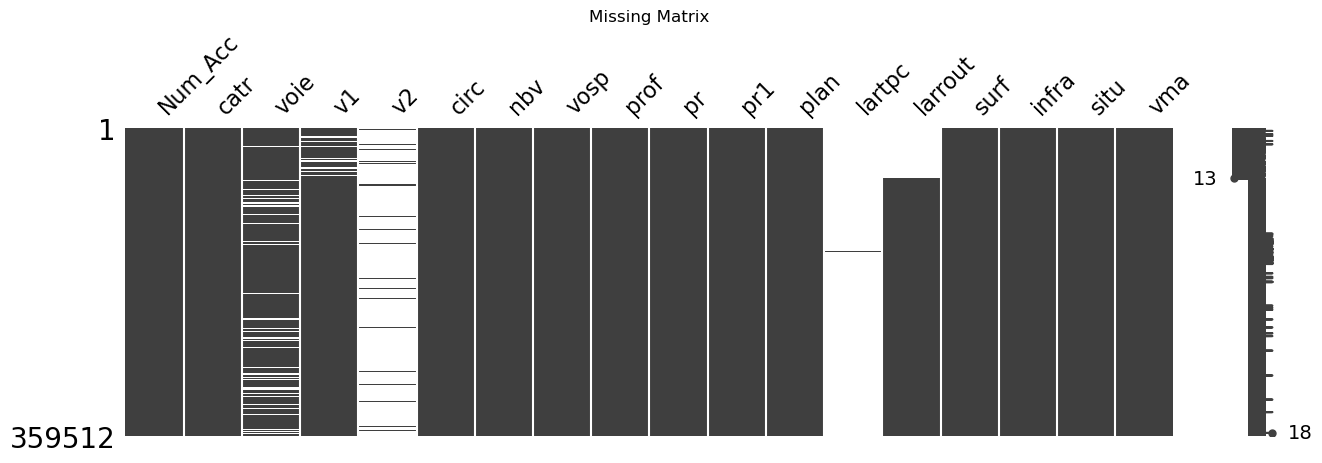

In [8]:
# 5 missing matrix
msno.matrix( df, 
             figsize=(15,4) )
plt.title( 'Missing Matrix' )
plt.show()

In [9]:
# ----------
# duplicates
# ----------
display( df.duplicated().sum() )

np.int64(2)

In [10]:
# saving via joblib
# DF -> { csv: :df.to_csv(), pkl: :dump(), joblib: :dump() }

dump(
    df, 
    '../../data/processed/1_exploration/1.0-munz-data-exploration_locations.joblib'
)


['../../data/processed/1_exploration/1.0-munz-data-exploration_locations.joblib']